##Deneyim'den Maas Tahmini

In [ ]:
!pwd

/content/sample_data


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
import pandas as pd
import numpy as np
import torch

In [ ]:
data=pd.read_csv("salary.xlsx")

In [ ]:
data.head(15)

,deneyim,maas
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
deneyim=torch.tensor(data['deneyim'],dtype=torch.float64)

In [ ]:
print(deneyim)

tensor([ 1.1000,  1.3000,  1.5000,  2.0000,  2.2000,  2.9000,  3.0000,  3.2000,
         3.2000,  3.7000,  3.9000,  4.0000,  4.0000,  4.1000,  4.5000,  4.9000,
         5.1000,  5.3000,  5.9000,  6.0000,  6.8000,  7.1000,  7.9000,  8.2000,
         8.7000,  9.0000,  9.5000,  9.6000, 10.3000, 10.5000],
       dtype=torch.float64)


In [ ]:
maas=torch.tensor(data['maas'])

In [ ]:
def model_1(deneyim,w,b):
  return w*deneyim+b

In [ ]:
def kayip_fonk(tahmin,gercek):
  farklar_karesi=(tahmin-gercek)**2
  return farklar_karesi.mean()

In [ ]:
def kayip_fonk_2(tahmin,gercek):
  t=0
  for i in range(len(tahmin)):
    t+=(tahmin[i]-gercek[i])**2
  return t/len(tahmin)

In [ ]:
def kismi_turev_w(deneyim,maas,w,b):
  n=len(deneyim)
  t=0
  for i in range(n):
    t+=deneyim[i]*(model_1(deneyim[i],w,b)-maas[i])
  return (2*t)/n

In [ ]:
def kismi_turev_b(deneyim,maas,w,b):
  n=len(deneyim)
  t=0
  for i in range(n):
    t+=(model_1(deneyim[i],w,b)-maas[i])
  return (2*t)/n

önce başlangic degerleri oluşturalim

In [ ]:
w=torch.tensor([1.0])
b=torch.tensor([0.0])
lr=0.0001

In [ ]:
toplam_epoch_sayisi=1000
kayiplar_listesi=[]
for epoch in range(toplam_epoch_sayisi):
  maas_tahmin=model_1(deneyim,w,b)
  kayip=kayip_fonk(maas_tahmin,maas)
  kayiplar_listesi.append(kayip)
  #print(f'Epoch: {epoch} icin kayip miktari: {kayip:.3f}')

  w_yeni=w-lr*kismi_turev_w(deneyim,maas,w,b)
  b_yeni=b-lr*kismi_turev_b(deneyim,maas,w,b)

  w=w_yeni
  b=b_yeni

In [ ]:
print(w)

tensor([12844.3340])


In [ ]:
print(b)

tensor([2918.2866])


In [ ]:
import matplotlib.pyplot as plt


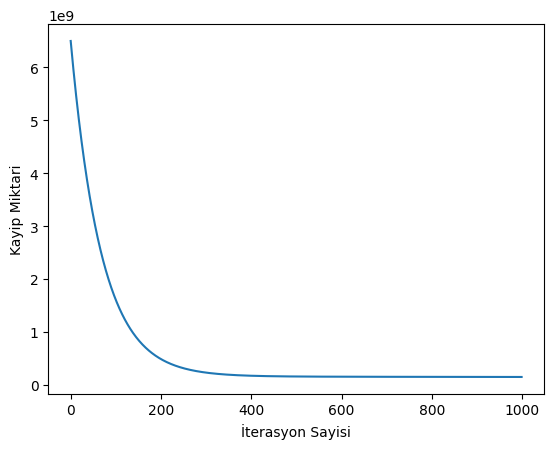

In [ ]:
plt.plot(torch.arange(toplam_epoch_sayisi),kayiplar_listesi)
plt.xlabel('İterasyon Sayisi')
plt.ylabel('Kayip Miktari')
plt.show()

In [ ]:
print()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## Türevlerin Pytorch ile Alınmasi

In [ ]:
parametreler=torch.tensor([1.0,0.0],requires_grad=True)

In [ ]:
toplam_epoch_sayisi=10
lr=0.01
kayiplar_listesi=[]
for epoch in range(toplam_epoch_sayisi):
  print(f'Epoch: {epoch} icin kayip miktari: {kayip:.3f}')
  #maas_tahmin=model_1(deneyim,parametreler[0],parametreler[1])
  maas_tahmin=model_1(deneyim,*parametreler)
  kayip=kayip_fonk(maas_tahmin,maas)
  kayiplar_listesi.append(kayip)

  kayip.backward()#kismi türevlerin hesaplnamasi icin

  with torch.no_grad():
    #parametreler=parametreler-lr*parametreler.grad
    parametreler-=lr*parametreler.grad

  parametreler.grad.zero_()

Epoch: 0 icin kayip miktari: 5711471115.423
Epoch: 1 icin kayip miktari: 6502000509.350
Epoch: 2 icin kayip miktari: 595408215.143
Epoch: 3 icin kayip miktari: 183104869.112
Epoch: 4 icin kayip miktari: 153441089.819
Epoch: 5 icin kayip miktari: 150433036.666
Epoch: 6 icin kayip miktari: 149289294.642
Epoch: 7 icin kayip miktari: 148283273.677
Epoch: 8 icin kayip miktari: 147294665.800
Epoch: 9 icin kayip miktari: 146315024.870


In [ ]:
print( parametreler.grad)

tensor([0., 0.])


In [ ]:
def model_2(deneyim,w1,w2,b):
  return w1*deneyim**2+w2*deneyim+b

In [ ]:
parametreler=torch.tensor([1.0,1.0,0.0],requires_grad=True)

In [ ]:
toplam_epoch_sayisi=10
lr=0.001
kayiplar_listesi=[]
for epoch in range(toplam_epoch_sayisi):
  print(f'Epoch: {epoch} icin kayip miktari: {kayip:.3f}')
  #maas_tahmin=model_1(deneyim,parametreler[0],parametreler[1],,parametreler[2])
  maas_tahmin=model_2(deneyim,*parametreler)
  kayip=kayip_fonk(maas_tahmin,maas)
  kayiplar_listesi.append(kayip)

  kayip.backward()#kismi türevlerin hesaplnamasi icin

  with torch.no_grad():
    #parametreler=parametreler-lr*parametreler.grad
    parametreler-=lr*parametreler.grad

  parametreler.grad.zero_()

Epoch: 0 icin kayip miktari: 8765424115649458527275789422449131520000.000
Epoch: 1 icin kayip miktari: 6494815564.132
Epoch: 2 icin kayip miktari: 81793348172.045
Epoch: 3 icin kayip miktari: 1208885189992.423
Epoch: 4 icin kayip miktari: 18076867660141.293
Epoch: 5 icin kayip miktari: 270519361029282.531
Epoch: 6 icin kayip miktari: 4048515161796192.000
Epoch: 7 icin kayip miktari: 60589112908264312.000
Epoch: 8 icin kayip miktari: 906762637674812032.000
Epoch: 9 icin kayip miktari: 13570399272936660992.000


In [ ]:
def model_3(deneyim,w1,w2,w3,w4,b1,b2,b3):
  top1=w1*deneyim+b1
  top2=w2*deneyim+b2
  return w3*top1+w4*top2+b3

In [ ]:
parametreler=torch.tensor([1.0,1.0,1.0,1.0,0.0,0.0,0.0],requires_grad=True)

In [ ]:
len(parametreler)

7

In [ ]:
toplam_epoch_sayisi=10
lr=0.0001
kayiplar_listesi=[]
for epoch in range(toplam_epoch_sayisi):
  print(f'Epoch: {epoch} icin kayip miktari: {kayip:.3f}')
  #maas_tahmin=model_1(deneyim,parametreler[0],parametreler[1],,parametreler[2])
  maas_tahmin=model_3(deneyim,*parametreler)
  kayip=kayip_fonk(maas_tahmin,maas)
  kayiplar_listesi.append(kayip)

  kayip.backward()#kismi türevlerin hesaplnamasi icin

  with torch.no_grad():
    #parametreler=parametreler-lr*parametreler.grad
    parametreler-=lr*parametreler.grad

  parametreler.grad.zero_()

Epoch: 0 icin kayip miktari: nan
Epoch: 1 icin kayip miktari: 6501045820.000
Epoch: 2 icin kayip miktari: 1351922639.259
Epoch: 3 icin kayip miktari: 36943672170820768.000
Epoch: 4 icin kayip miktari: 109372437547636663591206292665313263616.000
Epoch: 5 icin kayip miktari: 2835702402733757917027646104464178860688017876172157998387747241705427162123016318162806440022469771264.000
Epoch: 6 icin kayip miktari: nan
Epoch: 7 icin kayip miktari: nan
Epoch: 8 icin kayip miktari: nan
Epoch: 9 icin kayip miktari: nan
